# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [0]:
import pandas as pd
import numpy as np
import os,sys
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


In [3]:
from google.colab import files
#To get access to the files on google drive an authorization code it nessacery which will be given by the linked below
from google.colab import drive
drive.mount('/gdrive')
#The input directory in the google dirve
input_data_path="/gdrive/My Drive/Colab Notebooks/springboard_mini/EDA_racial_discrimination/"
#os.listdir(input_data_path+'/produced')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
data = pd.io.stata.read_stata(input_data_path+'data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [8]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [9]:
print(data.keys().values.tolist())

['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer', 'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool', 'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race', 'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite', 'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq', 'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales', 'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip', 'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip', 'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport', 'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq', 'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade', 'busservice', 'othservice', 'missind', 'ownership']


In [0]:
data.info()

In [17]:

print(data.describe())

         education       ofjobs     yearsexp       honors    volunteer  \
count  4870.000000  4870.000000  4870.000000  4870.000000  4870.000000   
mean      3.618480     3.661396     7.842916     0.052772     0.411499   
std       0.714997     1.219126     5.044612     0.223601     0.492156   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%       3.000000     3.000000     5.000000     0.000000     0.000000   
50%       4.000000     4.000000     6.000000     0.000000     0.000000   
75%       4.000000     4.000000     9.000000     0.000000     1.000000   
max       4.000000     7.000000    44.000000     1.000000     1.000000   

          military     empholes  occupspecific   occupbroad  workinschool  \
count  4870.000000  4870.000000    4870.000000  4870.000000   4870.000000   
mean      0.097125     0.448049     215.637782     3.481520      0.559548   
std       0.296159     0.497345     148.127551     2.038036      0.496492   
min       0.000000     0.

The data include 65 columnsand 4870 rows with more than 1.3 MB size. Based on the info() there are some missing data in parent_sales,parent_emp, branch_sales, branch_emp, fed, fracblack_empzip, fracwhite_empzip, lmedhhinc_empzip, fracdropout_empzip, fraccolp_empzip and linc_empzip. 


In [18]:
num_b=data['race'].isin(['b']).sum()
num_w=data['race'].isin(['w']).sum()
print('the number of black-sounded race entries:',num_b)
print('the number of white-sounded race entries:',num_w)

df=pd.DataFrame(index=['black_res','white_res'],columns=['Num_successful','Num_failure'])
df.loc['black_res','Num_successful']=data.call[data.race=='b'].sum()
df.loc['black_res','Num_failure']=data['race'].isin(['b']).sum()-data.call[data.race=='b'].sum()
df.loc['white_res','Num_successful']=data.call[data.race=='w'].sum()
df.loc['white_res','Num_failure']=data['race'].isin(['w']).sum()-data.call[data.race=='w'].sum()
df['successful_rate']=df.Num_successful/2435
df['failure_rate']=df.Num_failure/2435
df['dif_call']=df['Num_failure']-df['Num_successful']
df['prop_dif_call']=df['dif_call']/2435


print(df.loc['black_res','successful_rate']-df.loc['white_res','successful_rate'])
df

the number of black-sounded race entries: 2435
the number of white-sounded race entries: 2435
-0.032032854209445585


,Num_successful,Num_failure,successful_rate,failure_rate,dif_call,prop_dif_call
black_res,157,2278,0.064476,0.935524,2121,0.871047
white_res,235,2200,0.096509,0.903491,1965,0.806982


There is equal number of balck and white race entries.  The race data is a categoricall data with 'w' for white-sounded resume and 'b' for black-sounded resume. The call data is also categoricall, with 1 for resumes who succeeded to get the call interview and 0 for who have failed to do so. It seems that black-sounded resumes have shown %3.2 more successful rate to get the job interview call from employers comapre to white-sounded resume. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


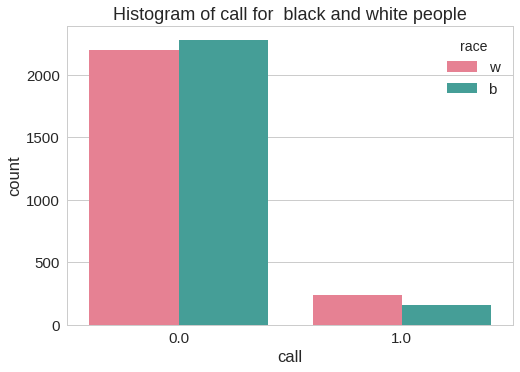

In [7]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig = plt.figure()
sns.countplot(data=data,x='call',hue='race',palette='husl')
plt.title('Histogram of call for  black and white people')
plt.show()
plt.close(fig)

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>
## 1- What test is appropriate for this problem? Does CLT apply?

There are 4870 data sample including 2435 sub_set of black and white race data. It can conclided that the number of sample size is large. Hence, [two-sample binomial proportion hypothesis tests](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Two_Proportions.pdf) or Bootstrapping tests may be applied here. Therefore we have: $$\text{binomial proportion: } p=\frac{\text{number of success}}{\text{total number}}\\\text{Z statistic: } z= \frac{p_w-p_b}{\sigma_D}\\\text{unpooled standard error: }\sigma_D=\sqrt{\frac{p_w(1-p_w)}{n_w}+\frac{p_b(1-p_b)}{n_b}}\\ \text{margin of error: } M_E=\sigma_D z$$
where $n_b=n_w=2435$ in here. 

## 2- What are the null and alternate hypotheses?
The null hypothesis can be if there are no difference bewtween black and with race to get the interview phone call. The population propotion of getting phone call successfully , $p$, in both groups are similar. Then the alternative hypothesis can be that there is a significant diffenerence between them (two-tailed test). $$H_{0}: p_w-p_b=0\\H_a: p_w- p_b\neq0$$

In [0]:
w = data[data.race=='w']
b = data[data.race=='b']

## 3- Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
### Bootstrapping approach


In [9]:
#defining bootstrap sampling function
def bs_sampling(data,size=10000):
  np.random.seed(10)
  #data:input data
  #size: size of sampling
  s=np.empty(size)
  for i in range(size): s[i]=np.sum(np.random.choice(data, size))/size
  return s

#creating bootsatrap samples
bs_w_call= bs_sampling(w.call)
bs_b_call= bs_sampling(b.call)

bs_diff= bs_w_call-bs_b_call
p_diff = (np.sum(w.call)-np.sum(b.call))/len(w.call)

bs_p_value=np.sum(bs_diff>=abs(p_diff))/len(bs_diff)
bs_conf_int= np.percentile(bs_diff, [2.5, 97.5])
bs_mu= np.mean(bs_diff) #mean of bootstraped sample
bs_me=bs_conf_int-bs_mu


print('Bootstraping test p-value:',bs_p_value)
print('Bootstraping confidence level: ',bs_conf_int)
print('Bootstrapping margin of error:',bs_me)



Bootstraping test p-value: 0.502
Bootstraping confidence level:  [0.0259 0.0382]
Bootstrapping margin of error: [-0.00611933  0.00618067]


The p_value from bootstraping hypothesis testing implys that the null value can not be rejected, because p-value>$\alpha = 0.05$. Hence, it can be concluded that the rate of successful callback for white-sounded resume is similar to the black-sounded one. 

[]

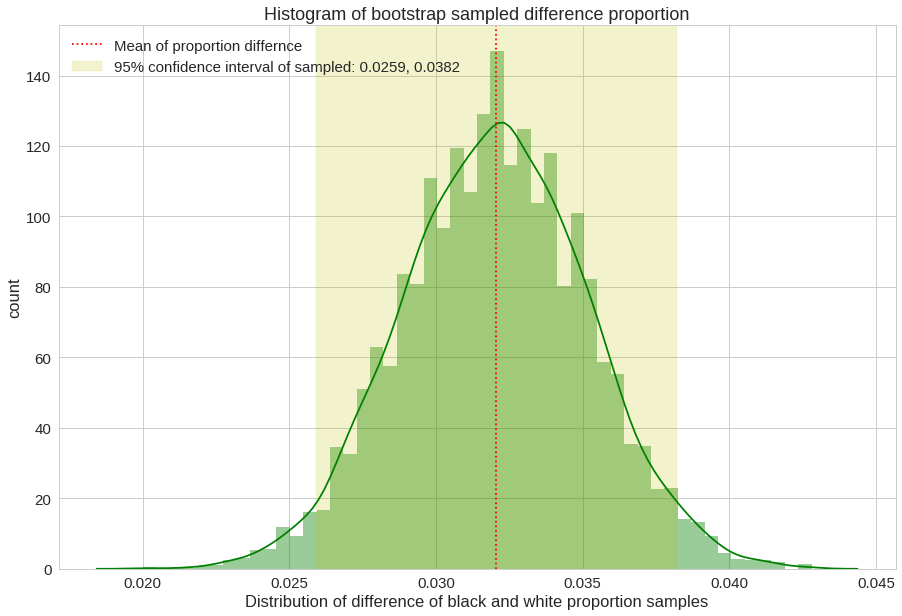

In [10]:
fig,axes=plt.subplots(1,figsize=(15,10))
axes=sns.distplot(bs_diff,color='green',norm_hist=True)
axes=plt.axvline(x=p_diff, color='r', linestyle=':',label='Mean of proportion differnce')
conintstr = str(round(bs_conf_int[0],4))+', '+str(round(bs_conf_int[1],4))
axes=plt.axvspan(bs_conf_int[0], bs_conf_int[1], color='y', alpha=.2, label = '95% confidence interval of sampled: '+conintstr)
axes=plt.title('Histogram of bootstrap sampled difference proportion')
axes=plt.ylabel('count')
axes=plt.legend()
plt.xlabel('Distribution of difference of black and white proportion samples')
plt.plot()

### Frequentist statistical approaches

In [0]:


#unpooled standard Eroor
ste=np.sqrt((df.loc['black_res','successful_rate']*(1-df.loc['black_res','successful_rate'])/num_b)+(df.loc['white_res','successful_rate']*(1-df.loc['white_res','successful_rate'])/num_w))
#Z-score value
z_score=((df.loc['white_res','successful_rate']-df.loc['black_res','successful_rate'])/ste)
#P-value form z_score
p_val = stats.norm.sf(z_score)*2
#margin of error for %95 confidence interval
me=ste*1.96
# Point Estimate
pe = df.loc['white_res','successful_rate']-df.loc['black_res','successful_rate']
#confidence level
con_int=[pe-me,pe+me]



print('Standar deviation (error): %4.3f \nZ-score: %4.3f \np-value: %f \nmargin of error: %4.3f \nconfidence interval:  '%(ste,z_score,p_val,me),con_int)


Standar deviation (error): 0.008 
Z-score: 4.116 
p-value: 0.000039 
margin of error: 0.015 
confidence interval:   [0.016777447859559147, 0.047288260559332024]


In [16]:
# Directly using statsmodel
from statsmodels.stats.proportion import proportions_ztest
stat, p_val = proportions_ztest([df.loc['white_res','successful_rate'], df.loc['black_res','successful_rate']], [num_b, num_b])
print('From ztest:\nZ-Score={0:0.3f}\nP-Value={1:0.3f}'.format(stat, p_val))

# Directly using statsmodel (chi-squared)
from statsmodels.stats.proportion import proportions_chisquare
stat, p_val, tbl = proportions_chisquare([df.loc['white_res','successful_rate'], df.loc['black_res','successful_rate']], [num_b, num_b])
print('\nFrom Chi-square test:\nZ-Score={0:0.3f} \nP-Value={1:0.3f}'.format(stat, p_val))



From ztest:
Z-Score=0.080
P-Value=0.936

From Chi-square test:
Z-Score=0.006 
P-Value=0.936


## 4- Write a story describing the statistical significance in the context or the original problem.

The dataset includes 4870 resume entries with two groups of white and black sounded race. each group contains 2435 entries.  The data have data of call feed back from employers. In black-sounding group has 157 cases has suceeded where as in white-sounding group only 235 had callbacks success. In other word, successful rate for balck-sounding group is 0.064476 and for white-sounding group is about 0.096509, resulting %3.2 difference between two groups. In order to examin if there is any racial discrimination basedon resume entries. 

To test the hypothesis, a bootstrap proportion test was preformed. The null hypotesis here would be if there is no difference between  two successful rates. The alternative hypothesis is these two successful rates are not equal. To preform the test,  a bootstrap sample  of mean of difference of proportions with size of 10000 were created. The bootstrap sample were compered with the mean of difference of successful rates. The p_value was larger than siginificant level ($\alpha=0.05$) giving that the null hypothesis can not be rejected. It means that the sucessful rate of two groups are similar and thee is no siginificant difference between them. 



## 5- Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? 
Based on the result of the test, there is no siginificant diffenece between the successful rate of callback of whote-sounding resume and black-sounding one. As a result it may be concluded that the race is not a significant factor in callback success. 